In [1]:
import pandas as pd

# Replace with your actual file name
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1.0,1.0,0.0,0.0,0.0,No


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
# Save cleaned data
df.to_csv('cleaned_appointments.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Replace with your actual file name
df = pd.read_csv('KaggleV2-May-2016.csv')

# Convert date columns to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate the difference in days and create 'DaysBetween' column
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Save cleaned data (now including 'DaysBetween')
df.to_csv('cleaned_appointments.csv', index=False)

# Replace with the actual feature columns you selected
features = ['Age', 'Scholarship', 'SMS_received', 'DaysBetween']
X = df[features]
y = df['No-show']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Replace with your actual file name
df = pd.read_csv('KaggleV2-May-2016.csv')

# Convert date columns to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate the difference in days and create 'DaysBetween' column
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Save cleaned data (now including 'DaysBetween')
df.to_csv('cleaned_appointments.csv', index=False)

# Replace with the actual feature columns you selected
features = ['Age', 'Scholarship', 'SMS_received', 'DaysBetween']
X = df[features]
y = df['No-show']

# Split data into train and test sets
# These are the variables that were not defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
# X_train and y_train should now be defined
model.fit(X_train, y_train)

# Now make predictions
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

          No       0.81      0.94      0.87     26525
         Yes       0.35      0.13      0.19      6634

    accuracy                           0.78     33159
   macro avg       0.58      0.54      0.53     33159
weighted avg       0.72      0.78      0.74     33159



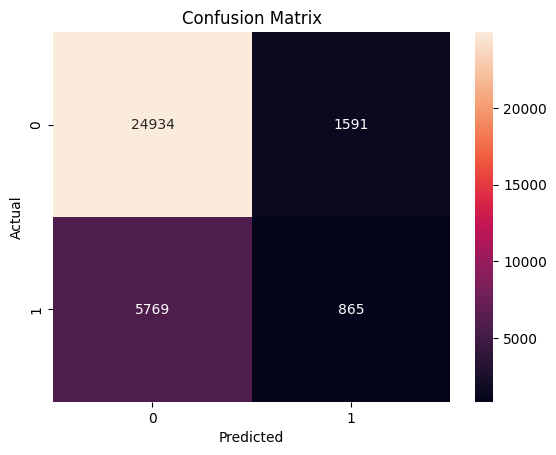

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
